In [29]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
from hands17 import hands17

hands17.pre_provide('/home/xwu/data/hands17')

splitted data: [  0 869] training, [869 993] test.
using shuffled data: /home/xwu/data/hands17/training/annotation_shuffled.txt
using cropped and resized images: /home/xwu/data/hands17/training/cropped


drawing BoundingBox: # 104


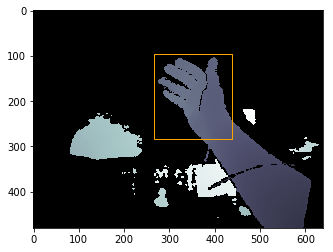

In [31]:
hands17.draw_bbox_random()

drawing pose: # 757


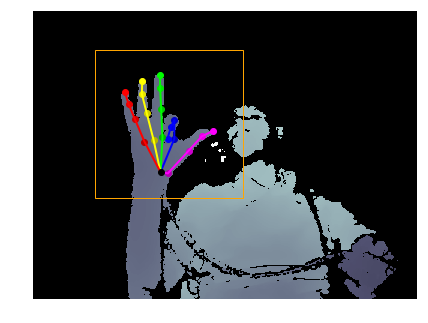

drawing pose: # 269


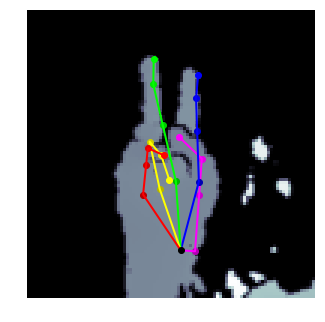

In [32]:
hands17.draw_pose2_random(
    hands17.training_images,
    hands17.training_annot
)
hands17.draw_pose2_random(
    hands17.training_cropped,
    hands17.training_annot_cropped
)